In [1]:
import tensorflow as tf
import numpy as np


In [2]:
from tensorflow import keras

In [3]:
from tensorflow.keras.layers import Embedding

In [4]:
embedding_layer=Embedding(500,5)

In [5]:
result=embedding_layer(tf.constant([1,2,3,4,5,6]))
result.numpy()

array([[ 3.31213214e-02, -1.36038773e-02, -1.45356767e-02,
        -3.47586386e-02,  2.88039334e-02],
       [ 2.93396153e-02,  9.16519016e-03,  2.49897279e-02,
         2.49940418e-02, -1.38378143e-03],
       [-1.61006227e-02,  3.84770967e-02,  5.97542524e-03,
         1.39353015e-02, -9.44862515e-03],
       [-1.93376783e-02, -1.85413584e-02,  3.73982079e-02,
        -4.10565138e-02,  4.12074476e-03],
       [-2.78986692e-02, -7.67819583e-05, -1.86813101e-02,
         1.48276798e-02, -1.04715452e-02],
       [-2.37600096e-02,  1.48968585e-02,  1.73530094e-02,
         1.28706731e-02, -2.11402178e-02]], dtype=float32)

In [6]:
result=embedding_layer(tf.constant([[1,2,3],[4,5,6]]))

result.shape

TensorShape([2, 3, 5])

In [7]:
result=embedding_layer(tf.constant([[1],[2],[3]]))
result.shape

TensorShape([3, 1, 5])

In [5]:
import tensorflow_datasets as tfds

In [6]:
(train_data,test_data),info=tfds.load('imdb_reviews/subwords8k',split=(tfds.Split.TRAIN,tfds.Split.TEST),
                                     with_info=True,as_supervised=True)

In [7]:
encoder=info.features['text'].encoder
encoder.subwords[20:40]

['t_',
 'with_',
 'for_',
 '.<',
 'on_',
 'but_',
 'movie_',
 ' (',
 'are_',
 'his_',
 'have_',
 'film_',
 'not_',
 'ing_',
 'be_',
 'ed_',
 'you_',
 ' "',
 'it',
 'd_']

In [12]:
train_data

<PrefetchDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>

In [14]:
train_batch=train_data.shuffle(1000).padded_batch(10,padded_shapes=([None],[]))
test_batch=test_data.shuffle(1000).padded_batch(10,padded_shapes=([None],[]))

In [17]:
train_Batch,train_labels=next(iter(train_batch))
train_Batch.numpy()

array([[  62,    9,   43, ...,    0,    0,    0],
       [5242, 1297,  654, ...,    0,    0,    0],
       [6388,   11, 2636, ...,    0,    0,    0],
       ...,
       [ 519,  198,   46, ...,   17, 8035, 8031],
       [  12, 5705, 7961, ...,    0,    0,    0],
       [  62,   27,    9, ...,    0,    0,    0]])

In [19]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,GlobalAveragePooling1D

In [20]:
embedding_dim=16

model=Sequential([
    Embedding(encoder.vocab_size,embedding_dim),
    GlobalAveragePooling1D(),
    Dense(16,activation='relu'),
    Dense(1)
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [23]:
history=model.fit(train_batch,epochs=10,validation_data=test_batch,verbose=1,validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 14s 6ms/step - loss: 0.5190 - accuracy: 0.6936 - val_loss: 0.4297 - val_accuracy: 0.8650
Epoch 2/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.2903 - accuracy: 0.8799 - val_loss: 0.4366 - val_accuracy: 0.8850
Epoch 3/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.2361 - accuracy: 0.9095 - val_loss: 0.3643 - val_accuracy: 0.8600
Epoch 4/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.2051 - accuracy: 0.9210 - val_loss: 0.2752 - val_accuracy: 0.8900
Epoch 5/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1816 - accuracy: 0.9324 - val_loss: 0.2801 - val_accuracy: 0.8800
Epoch 6/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1630 - accuracy: 0.9411 - val_loss: 0.4508 - val_accuracy: 0.8550
Epoch 7/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.1463 - accuracy: 0.9483 - val_loss: 0.2978 - val_accuracy

In [25]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

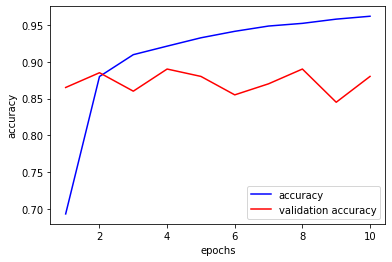

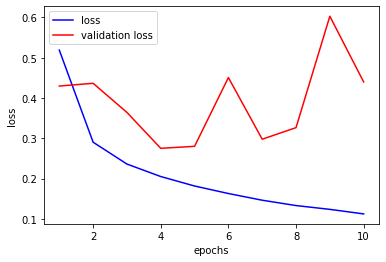

<Figure size 432x288 with 0 Axes>

In [28]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label='accuracy')
plt.plot(epochs,val_acc,'r',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'b',label='loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.figure()

In [31]:
e=model.layers[0]
weights=e.get_weights()[0]
weights.shape

(8185, 16)

## RNN on tfds.imdb data

In [11]:
dataset,info=tfds.load('imdb_reviews/subwords8k',
                                     with_info=True,as_supervised=True)

In [12]:
train_examples=dataset['train']
test_examples=dataset['test']

In [13]:
encoder=info.features['text'].encoder

In [14]:
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [15]:
print('the size of the vocabulary is {}'.format(encoder.vocab_size))

the size of the vocabulary is 8185


In [18]:
string='Hello from Tensorflow '

encoded_string=encoder.encode(string)
print('the encoded string is {}'.format(encoded_string))

original_string=encoder.decode(encoded_string)
print('the decoded string is {}'.format(original_string))

the encoded string is [4025, 222, 48, 6307, 2327, 2934, 7961]
the decoded string is Hello from Tensorflow 


In [20]:
for index in encoded_string:
    print('{} -----> {}'.format(index,encoder.decode([index])))

4025 -----> Hell
222 -----> o 
48 -----> from 
6307 -----> Ten
2327 -----> sor
2934 -----> flow
7961 ----->  


In [21]:
train_dataset=train_examples.shuffle(10000).padded_batch(64,padded_shapes=([None],[]))
test_dataset=test_examples.padded_batch(64,padded_shapes=([None],[]))

In [22]:
#creating a rnn model using bidirectional lstm for increasing 
#the accuracy by considering long sequence dependencies

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional,LSTM,Dense,Embedding

model=Sequential([
    Embedding(encoder.vocab_size,64),
    Bidirectional(LSTM(64)),
    Dense(64,activation='relu'),
    Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [ ]:
history=model.fit(train_dataset,epochs=10,validation_data=test_dataset,verbose=1,validation_steps=30)

Epoch 1/10
     52/Unknown - 81s 2s/step - loss: 0.6930 - accuracy: 0.4937